In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Resources/Autism.csv")
# # Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# # Drop the null rows
df = df.dropna()
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(1117, 23)


,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [3]:
df.describe()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score
count,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000
mean,1344.828111,0.740376,0.487019,0.507610,0.538944,0.521934,0.325873,0.444047,0.648165,0.368845,0.606983,30.134288,5.189794
std,637.671292,0.438625,0.500055,0.500166,0.498704,0.499742,0.468910,0.497082,0.477757,0.482708,0.488639,10.490389,2.558940
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,837.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1319.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,28.000000,5.000000
75%,1878.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,7.000000
max,2497.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,10.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [5]:
df.dtypes

Case No             int64
A1                  int64
A2                  int64
A3                  int64
A4                  int64
A5                  int64
A6                  int64
A7                  int64
A8                  int64
A9                  int64
A10                 int64
Age                 int64
Sex                object
Ethnicity          object
Jaundice           object
Family_ASD         object
Residence          object
Used_App_Before    object
Score               int64
Screening Type     object
Language           object
User               object
Class              object
dtype: object

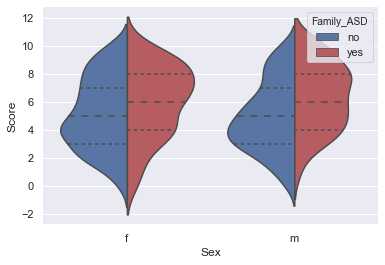

In [6]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Sex", y="Score", hue="Family_ASD", data=df, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

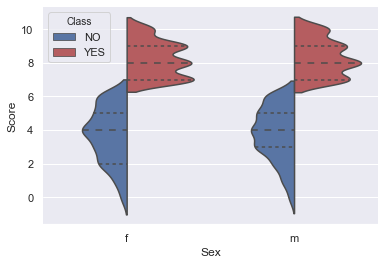

In [7]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Sex", y="Score", hue="Class", data=df, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

In [8]:
bins = [17, 24, 34, 44, 54, 64, 90]
group_labels = ["<25", "25-34", "35-44", "45-54", "55-64", "65+" ]
df["Age_Group"] = pd.cut(df["Age"], bins, labels=group_labels)
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class,Age_Group
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO,25-34
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES,<25
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO,<25
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES,45-54
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO,<25


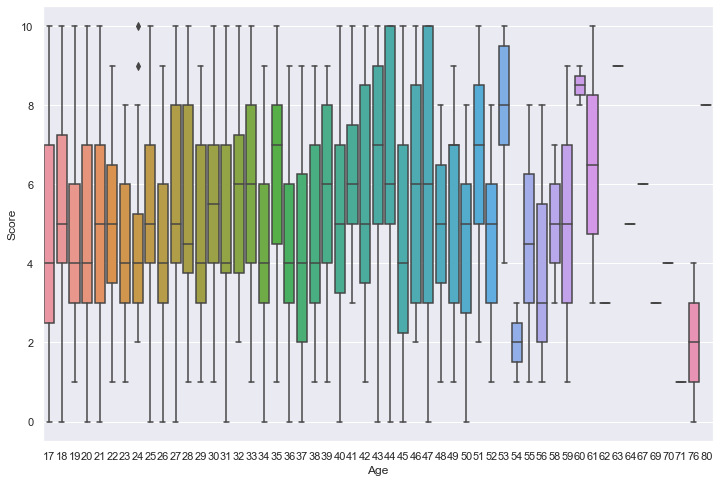

In [9]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Age', y='Score', data=df)

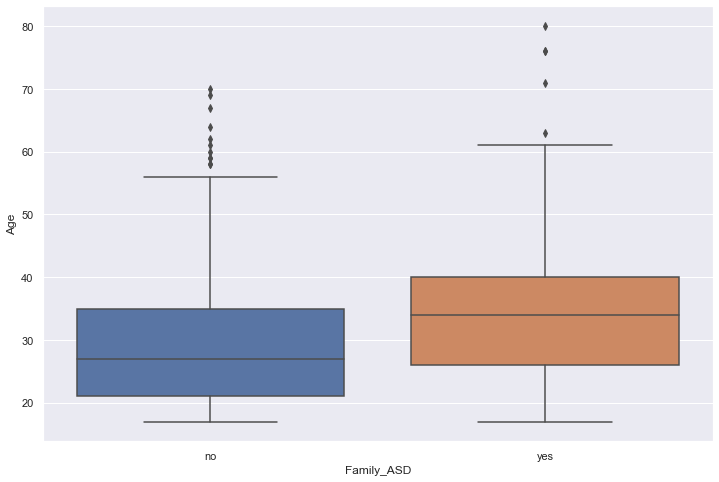

In [18]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Family_ASD', y='Age', data=df)

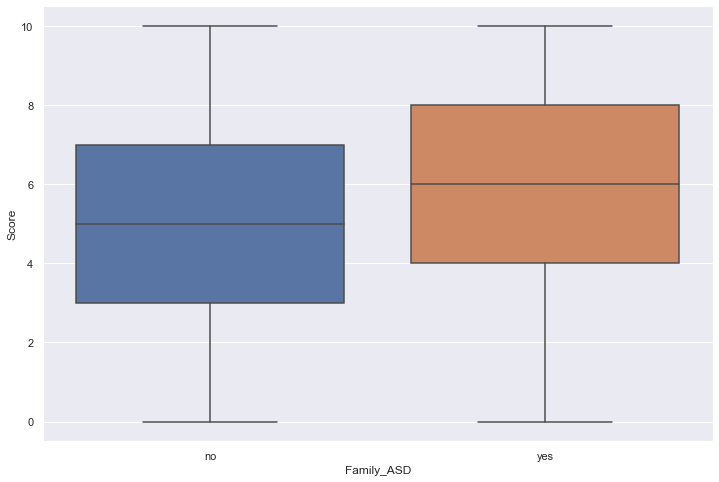

In [11]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Family_ASD', y='Score', data=df)

In [12]:
df

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class,Age_Group
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO,25-34
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES,<25
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO,<25
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES,45-54
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO,<25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2486,0,1,1,0,0,0,0,0,0,0,51,f,white,no,yes,New Zealand,no,2,17 and more,english,self,NO,45-54
1114,2487,1,1,1,1,1,1,1,1,1,1,43,m,white,no,no,United Kingdom,no,10,17 and more,english,self,YES,35-44
1115,2489,1,0,0,0,0,0,1,1,1,1,43,m,white,yes,yes,United Kingdom,no,5,17 and more,english,self,NO,35-44
1116,2492,1,1,0,1,1,1,0,1,0,1,21,f,white,no,no,United States,no,7,17 and more,english,self,YES,<25


In [14]:
df.columns

Index(['Case No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age', 'Sex', 'Ethnicity', 'Jaundice ', 'Family_ASD', 'Residence',
       'Used_App_Before', 'Score', 'Screening Type', 'Language', 'User',
       'Class', 'Age_Group'],
      dtype='object')

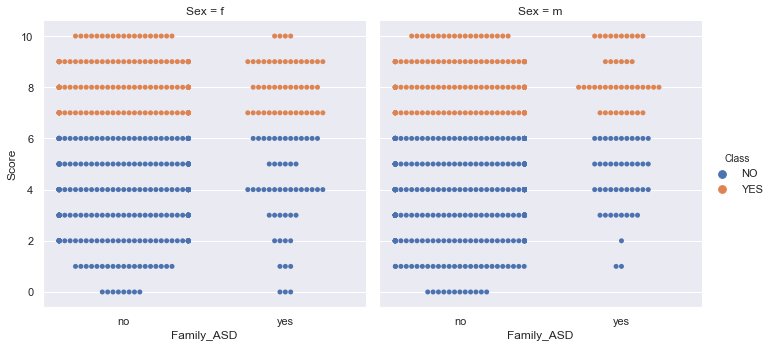

In [16]:
sns.factorplot(x="Family_ASD", y="Score", hue="Class", col="Sex", data=df, kind="swarm");

Text(0.5, 1.0, 'Distribution of Those With versus Those Without ASD')

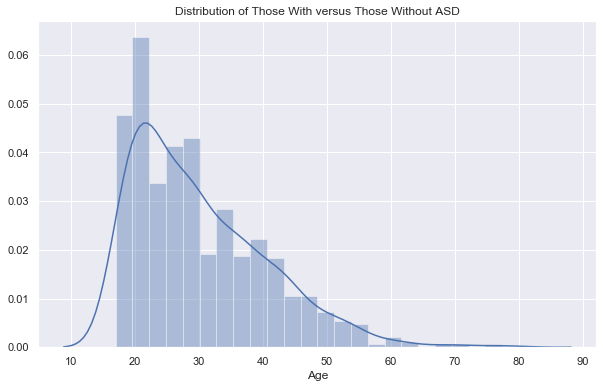

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age']).set_title('Distribution of Those With versus Those Without ASD')